In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
water_data = pd.read_csv("../src/data/water.csv")

In [6]:
water_data.describe()

,Quarter,Lat_Deg,Depthm,T_degC,PO4uM,SiO3uM,NO2uM,NO3uM,Salnty,O2ml_L
count,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000,337792.000000
mean,2.404725,32.123416,170.392887,11.185802,1.483006,26.308965,0.041654,17.234587,33.721150,3.728877
std,1.124341,2.069323,214.807837,3.820133,0.998076,26.871026,0.102860,14.576561,0.414828,1.991083
min,1.000000,19.000000,0.000000,1.480000,0.000000,0.000000,0.000000,-0.400000,29.402000,-0.010000
25%,1.000000,31.000000,40.000000,8.200000,0.420000,3.100000,0.000000,0.600000,33.400000,1.990000
50%,2.000000,32.000000,103.000000,10.450000,1.480000,18.000000,0.010000,18.000000,33.682100,3.930000
75%,3.000000,33.000000,250.000000,14.170000,2.330000,41.600000,0.030000,30.000000,34.080000,5.680000
max,4.000000,47.000000,5351.000000,30.020000,5.210000,186.000000,8.190000,95.000000,37.034000,11.130000


In [10]:
water_data = water_data[(water_data["O2ml_L"] >= 0) & (water_data["NO3uM"] >= 0)].copy()
features = ["Depthm", "T_degC", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "Salnty"]
target = "O2ml_L"

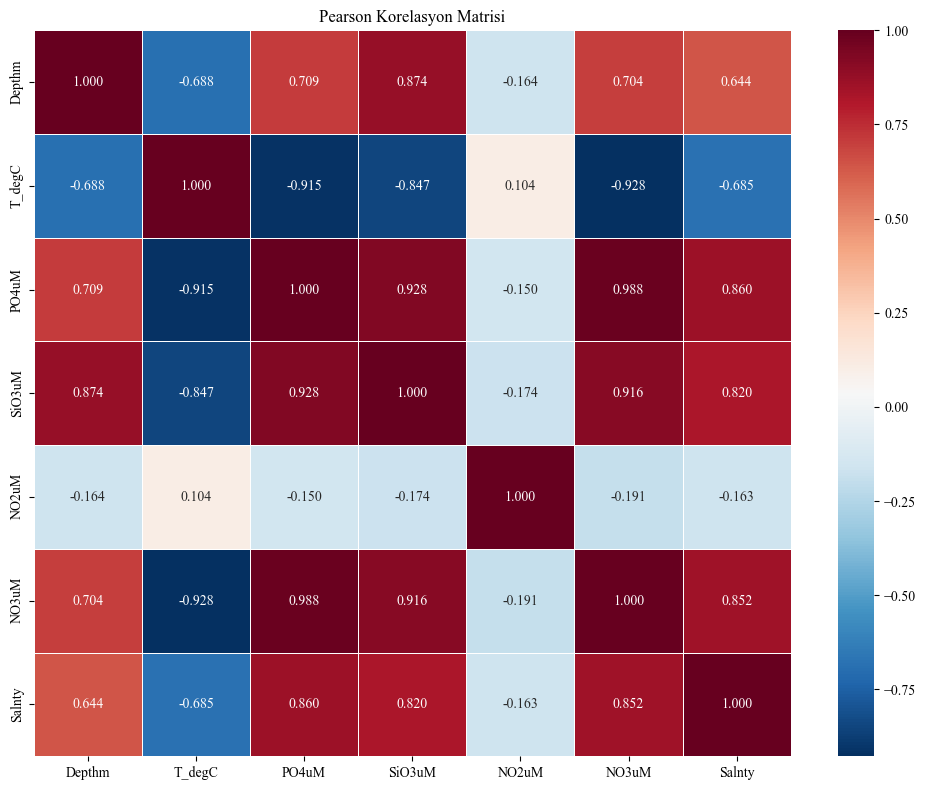

In [ ]:
correlation_matrix = water_data[features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".3f", linewidths=0.5)
plt.title('Pearson Korelasyon Matrisi')
plt.tight_layout()
plt.show()


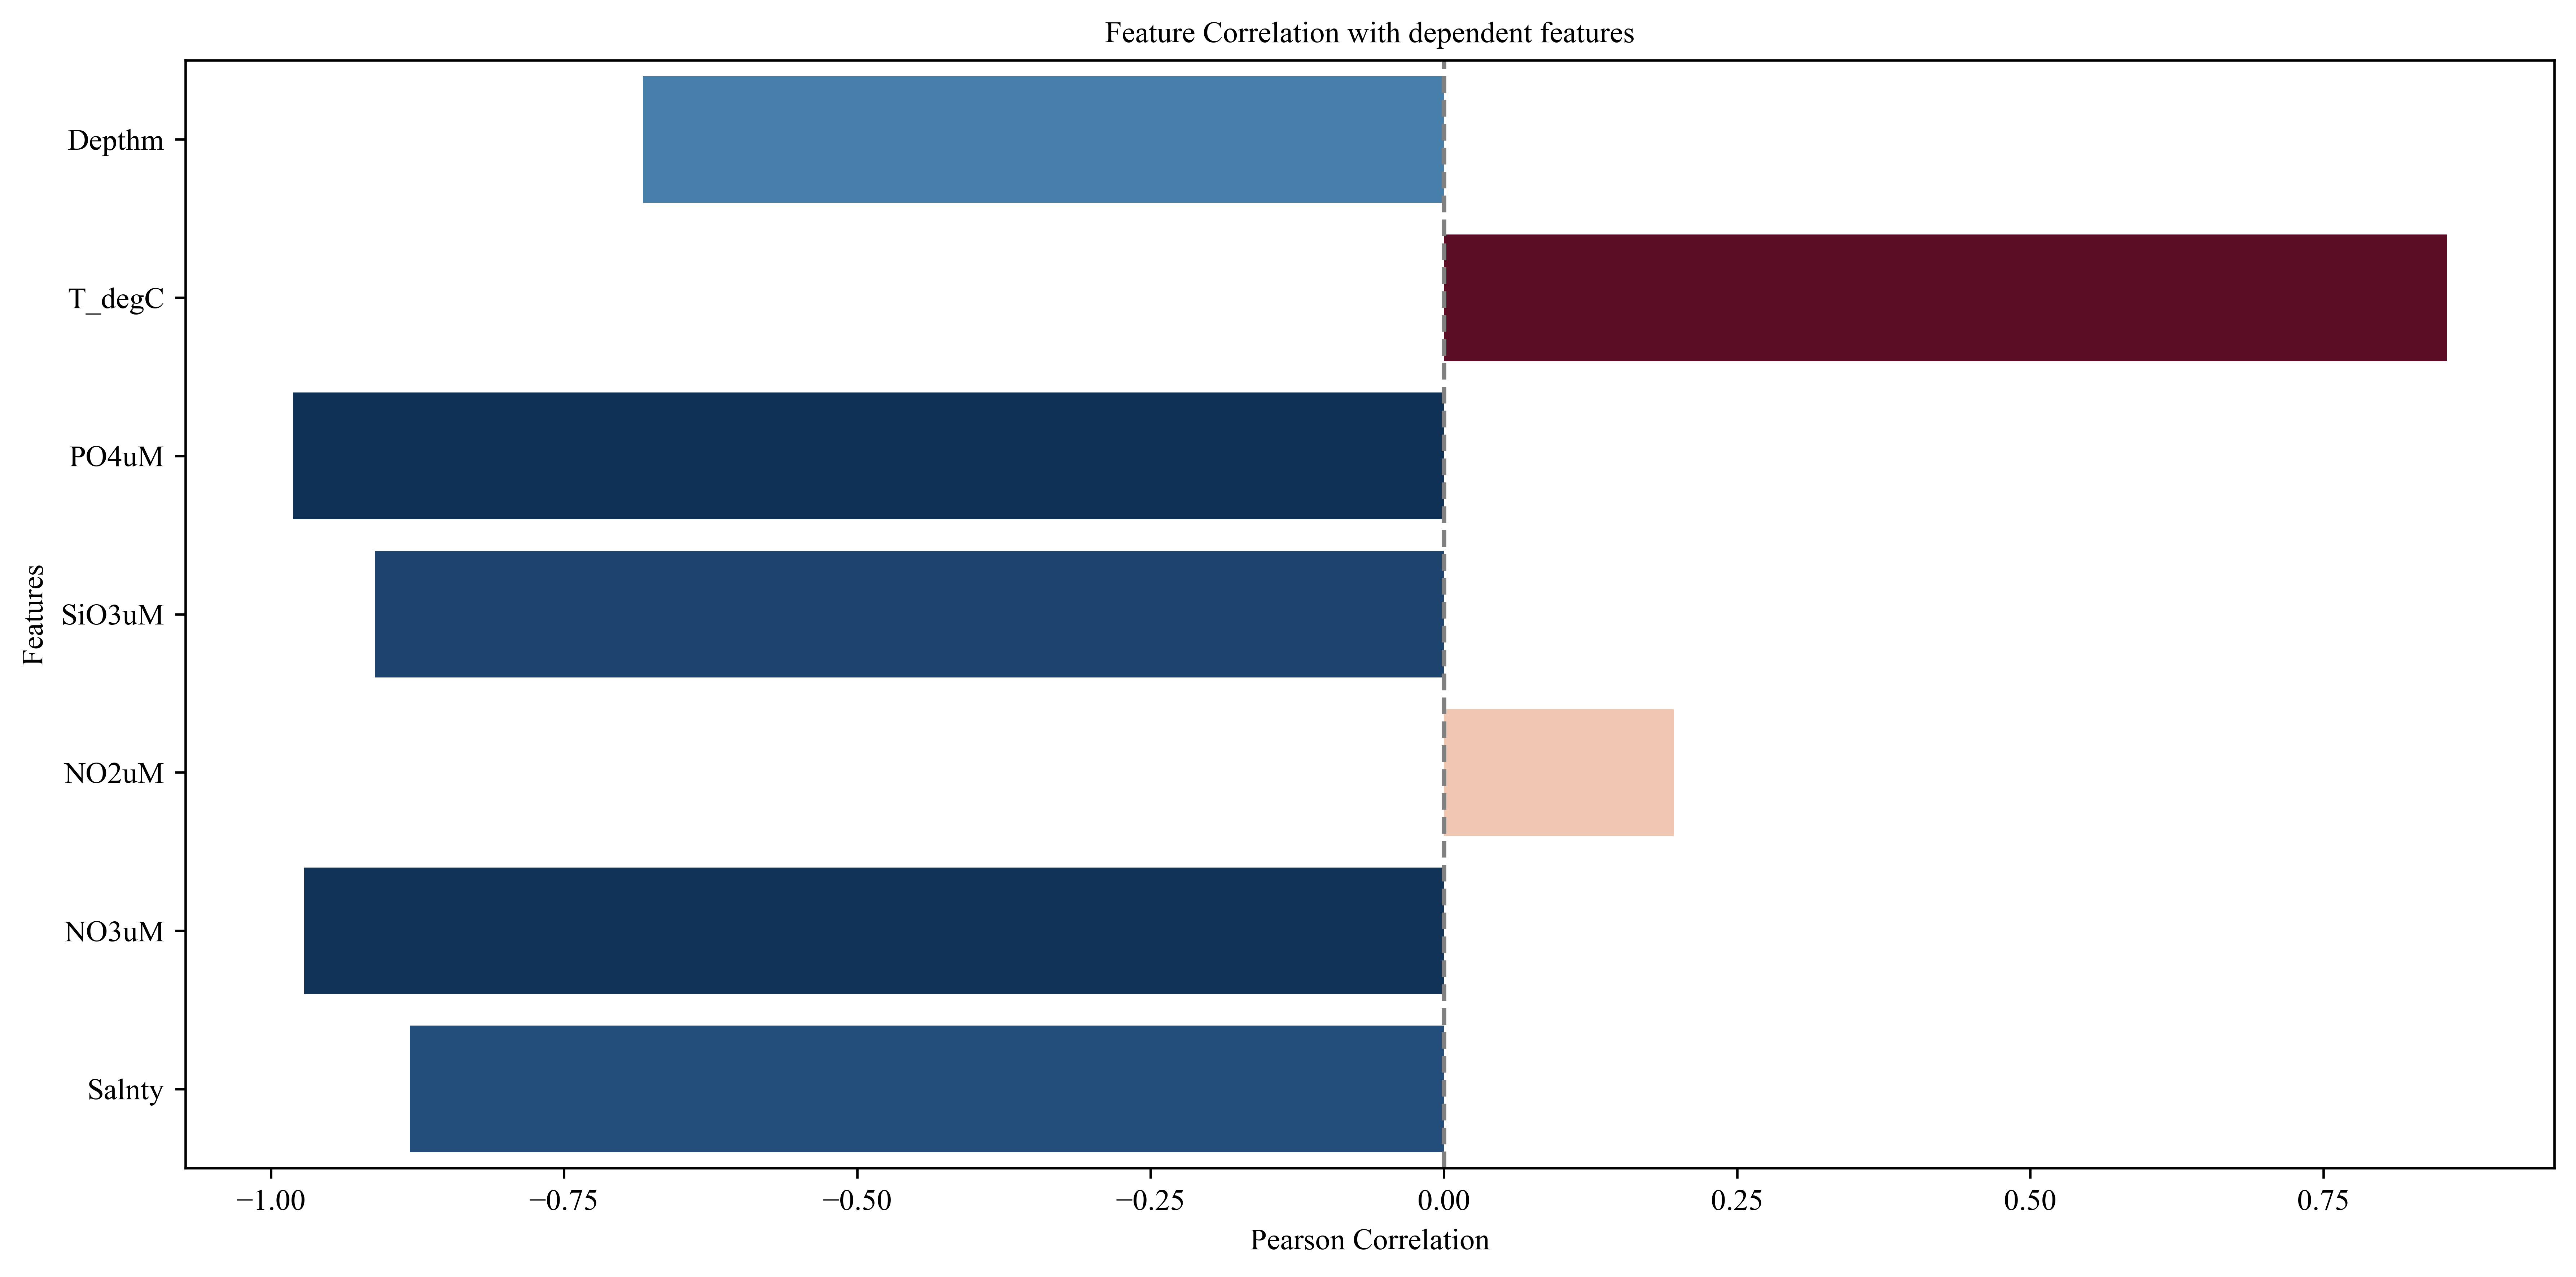

In [ ]:
correlations = water_data[features+[target]].corr(method='pearson')['O2ml_L'].drop('O2ml_L')

fontsize = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = fontsize

plt.figure(figsize=(12, 6), dpi=600)
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.values, palette='RdBu_r', legend=False)
plt.title("Feature Correlation with dependent features",fontsize=fontsize)
plt.xlabel("Pearson Correlation")
plt.ylabel("Features")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

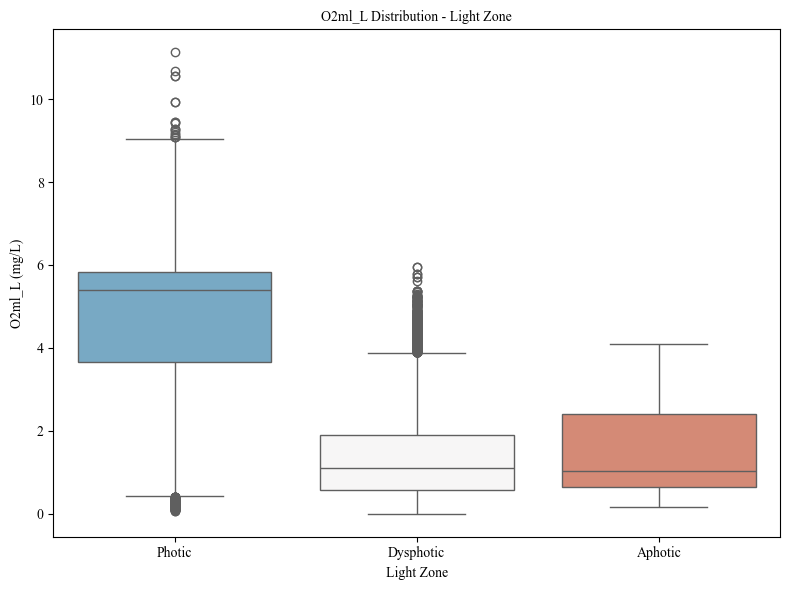

In [ ]:
def classify_zone(depth):
    if depth <= 200:
        return 'Photic'
    elif depth <= 1000:
        return 'Dysphotic'
    else:
        return 'Aphotic'

# 2. Yeni bir sütun ekle
water_data['Light_Zone'] = water_data['Depthm'].apply(classify_zone)

fontsize = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = fontsize

plt.figure(figsize=(8, 6))
sns.boxplot(data=water_data, x='Light_Zone', y='O2ml_L', hue='Light_Zone', palette='RdBu_r', legend=False)
plt.title('O2ml_L Distribution - Light Zone',fontsize=fontsize)
plt.xlabel('Light Zone')
plt.ylabel('O2ml_L (mg/L)')
plt.tight_layout()
plt.show()